*Data Preparation And Pre-processing Steps*

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Create a mixed dataset
data = pd.read_csv('transaction_dataset.csv') 

data = data.dropna()

# Separate features and target
X = data.drop('FLAG', axis=1)  # Update 'FLAG' to your target column name if different
y = data['FLAG']

# Preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Apply SMOTE for imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)



# SVC

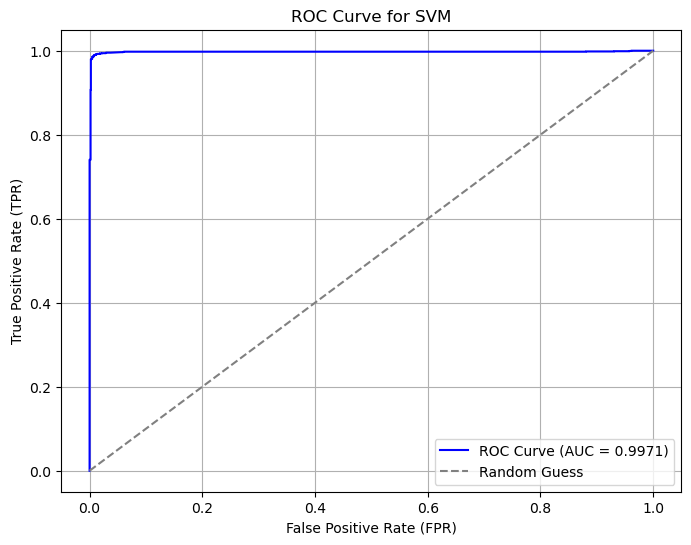

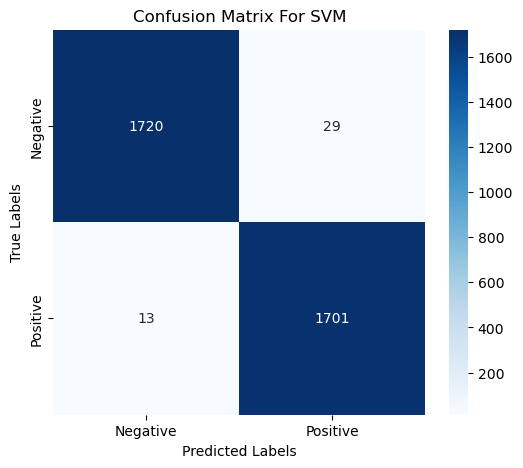

Accuracy: 0.9879
Precision: 0.9832
Recall: 0.9924
F1 Score: 0.9878


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from sklearn.svm import SVC

# Train the SVM model with probability enabled
svm_model = SVC(kernel='sigmoid', C=10, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

# Predict probabilities and labels
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = svm_model.predict(X_test)

# Calculate ROC curve and AUC
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_pred_proba)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='blue', label=f'ROC Curve (AUC = {svm_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For SVM')
plt.show()

# Evaluation Metrics
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")


# KNN Classifier

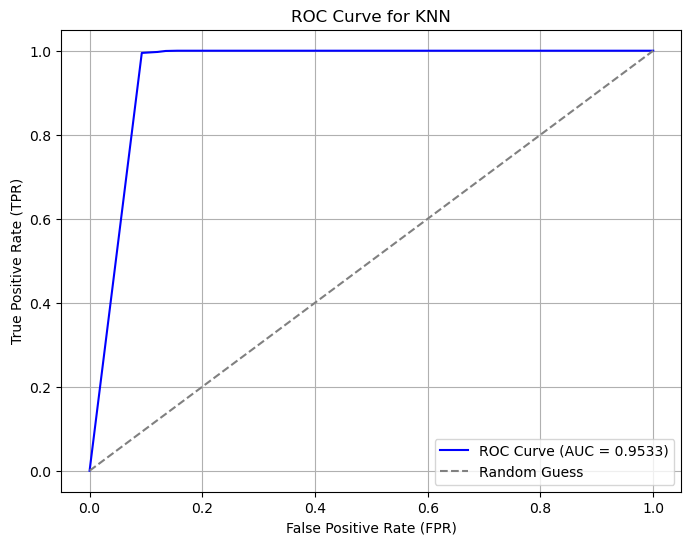

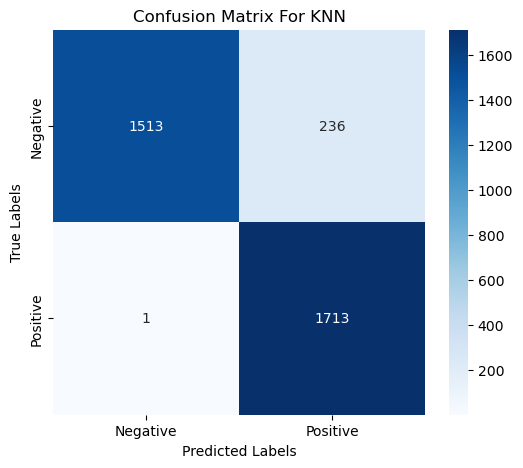

Accuracy: 0.9316
Precision: 0.8789
Recall: 0.9994
F1 Score: 0.9353


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict probabilities and labels
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, y_pred_proba)
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='blue', label=f'ROC Curve (AUC = {knn_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For KNN')
plt.show()

# Evaluation Metrics
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}")


# Logistic Regression

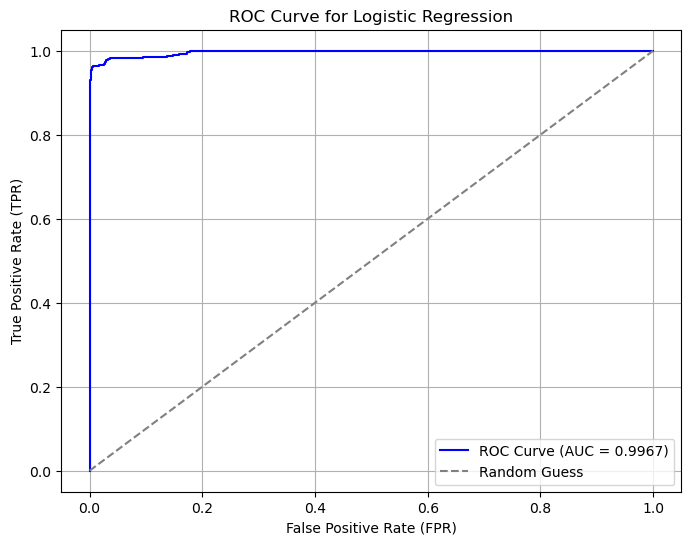

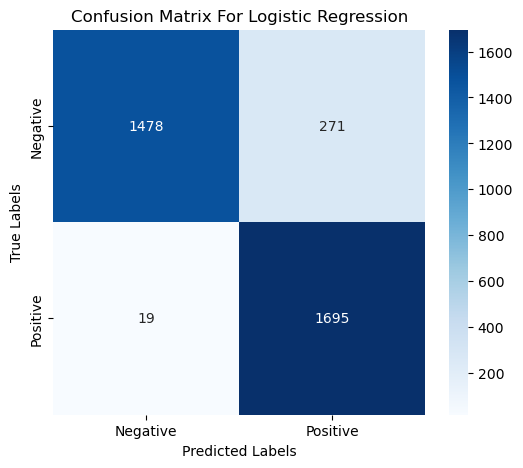

Accuracy: 0.9163
Precision: 0.8622
Recall: 0.9889
F1 Score: 0.9212


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(C=0.0001)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict probabilities and labels
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
log_reg_fpr, log_reg_tpr, thresholds = roc_curve(y_test, y_pred_proba)
log_reg_roc_auc = auc(log_reg_fpr, log_reg_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(log_reg_fpr, log_reg_tpr, color='blue', label=f'ROC Curve (AUC = {log_reg_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

# Evaluation Metrics
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_precision = precision_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)
log_reg_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1 Score: {log_reg_f1:.4f}")


# Gaussian Naive Bayes

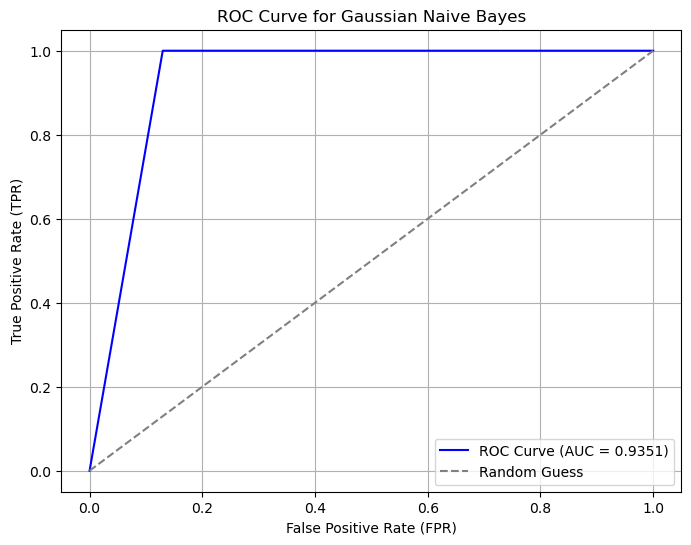

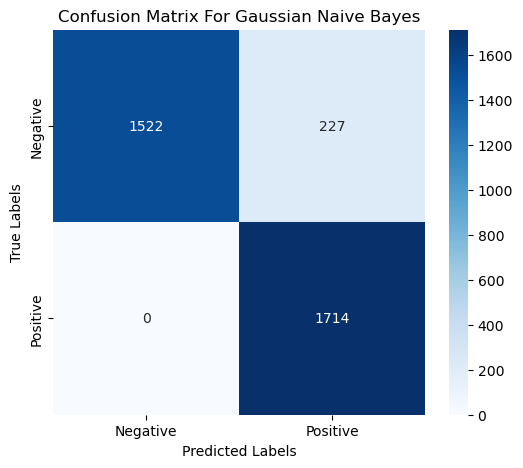

Accuracy: 0.9344
Precision: 0.8830
Recall: 1.0000
F1 Score: 0.9379


In [98]:
from sklearn.naive_bayes import GaussianNB

# Convert sparse matrices to dense arrays
X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# Train the Naive Bayes classifier
GNB = GaussianNB(var_smoothing=2e-9)
GNB.fit(X_train_dense, y_train)

# Predict probabilities and labels
y_pred = GNB.predict(X_test_dense)
y_pred_proba = GNB.predict_proba(X_test_dense)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred_proba)
nb_roc_auc = auc(nb_fpr, nb_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='blue', label=f'ROC Curve (AUC = {nb_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Gaussian Naive Bayes')
plt.show()

# Evaluation Metrics
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")


# Multi Layer Preceptron Classifier

c:\Users\97433\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


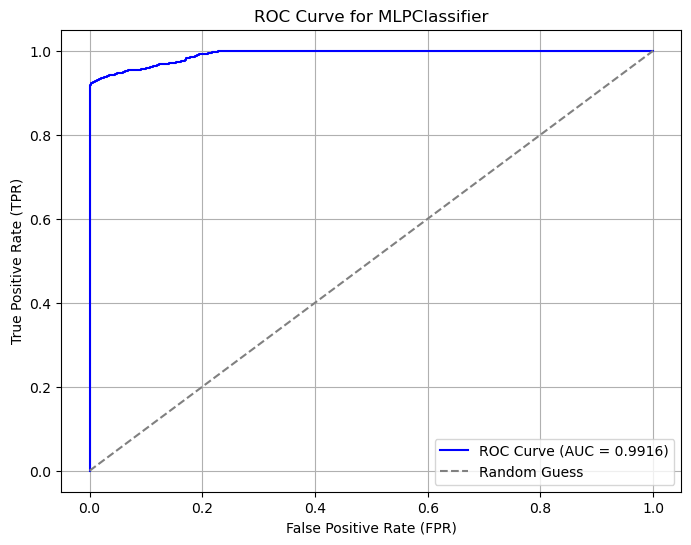

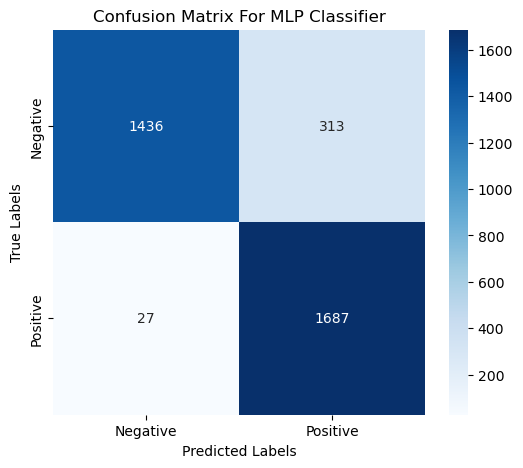

Accuracy: 0.9018
Precision: 0.8435
Recall: 0.9842
F1 Score: 0.9085


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
classifier = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50),
    max_iter=30,
    activation='relu',
    solver='sgd', 
    learning_rate_init=0.0001, 
    random_state=None
)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict probabilities and labels
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
mlp_fpr, mlp_tpr, thresholds = roc_curve(y_test, y_pred_proba)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mlp_fpr, mlp_tpr, color='blue', label=f'ROC Curve (AUC = {mlp_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for MLPClassifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For MLP Classifier')
plt.show()

# Evaluation Metrics
mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred)
mlp_recall = recall_score(y_test, y_pred)
mlp_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="f1")

grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
print(rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


c:\Users\97433\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.9767259051853336
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)


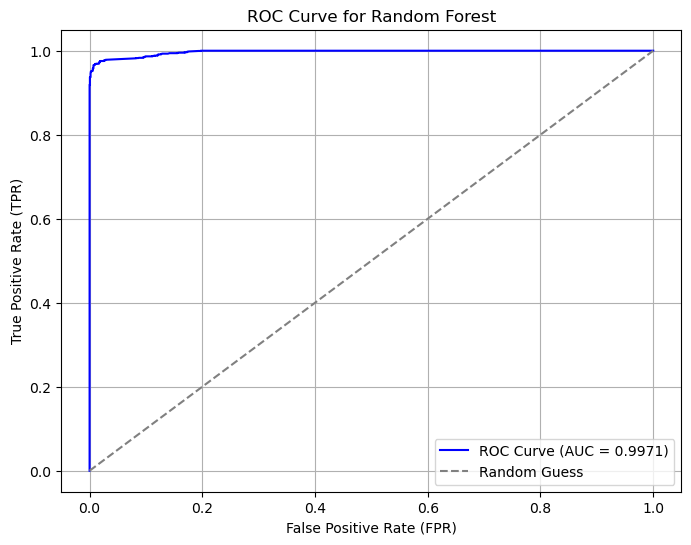

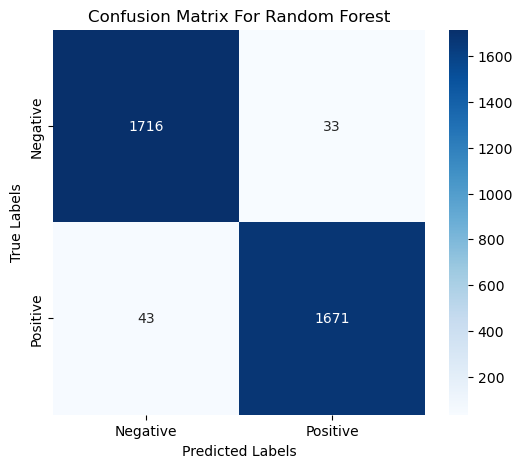

Accuracy: 0.9781
Precision: 0.9806
Recall: 0.9749
F1 Score: 0.9778


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

# Fit the Random Forest model
rf_best.fit(X_train, y_train)

# Predict probabilities and labels
y_pred = rf_best.predict(X_test)
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred_proba)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'ROC Curve (AUC = {rf_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Random Forest')
plt.show()

# Evaluation Metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")


# XGBoost

c:\Users\97433\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9879
Precision: 0.9964
Recall: 0.9790
F1 Score: 0.9876


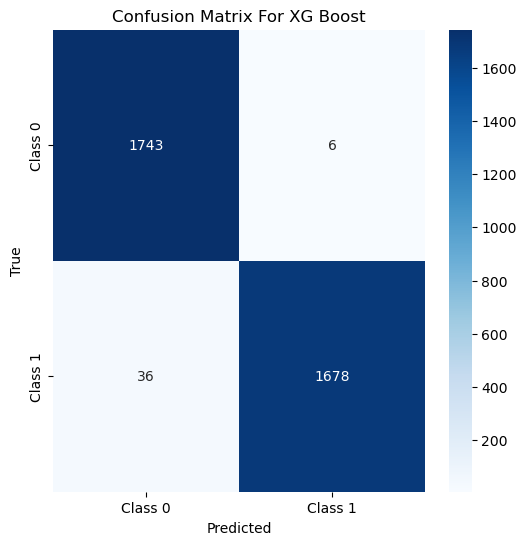

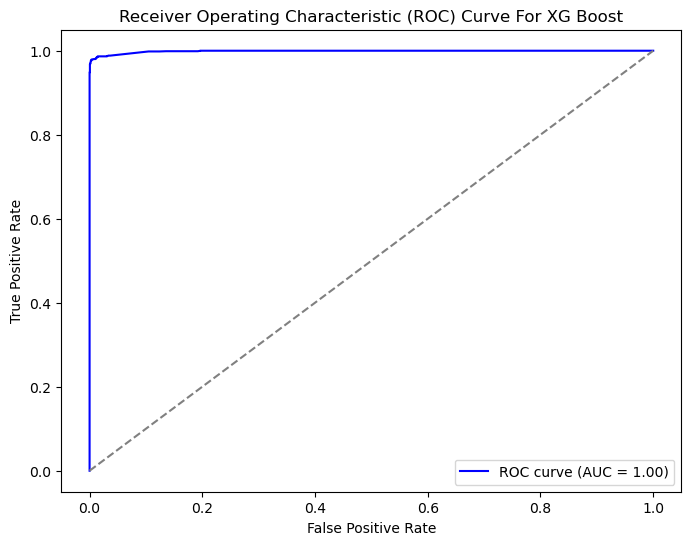

In [102]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)


# Make predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # For ROC curve (probability of class 1)

# Evaluate the model
xg_accuracy = accuracy_score(y_test, y_pred)
xg_precision = precision_score(y_test, y_pred)
xg_recall = recall_score(y_test, y_pred)
xg_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {xg_accuracy:.4f}")
print(f"Precision: {xg_precision:.4f}")
print(f"Recall: {xg_recall:.4f}")
print(f"F1 Score: {xg_f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix For XG Boost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve and AUC
xg_fpr, xg_tpr, thresholds = roc_curve(y_test, y_prob)
xg_roc_auc = auc(xg_fpr, xg_tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(xg_fpr, xg_tpr, color='b', label=f'ROC curve (AUC = {xg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve For XG Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# LightGBM

In [ ]:
!pip install lightgbm

[LightGBM] [Info] Number of positive: 4057, number of negative: 4022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 8079, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502166 -> initscore=0.008664
[LightGBM] [Info] Start training from score 0.008664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

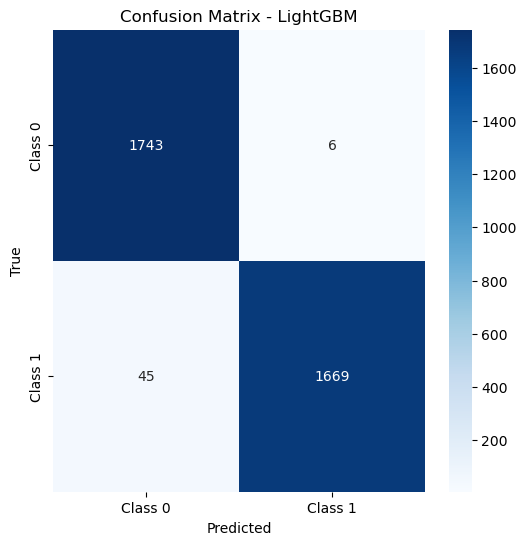

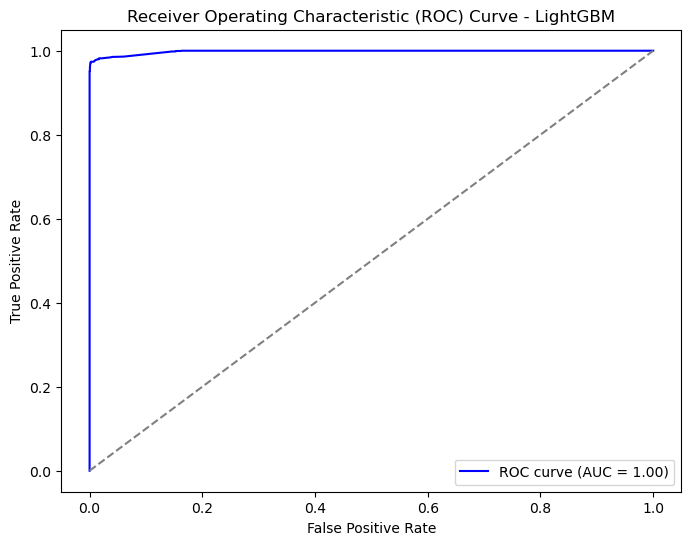

Accuracy: 0.9853
Precision: 0.9964
Recall: 0.9737
F1 Score: 0.9850


In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from lightgbm import LGBMClassifier
import seaborn as sns

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]  # For ROC curve (probability of class 1)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve and AUC
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_prob_lgbm)
lgbm_roc_auc = roc_auc_score(y_test, y_prob_lgbm)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='b', label=f'ROC curve (AUC = {lgbm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Precision: {precision_lgbm:.4f}")
print(f"Recall: {recall_lgbm:.4f}")
print(f"F1 Score: {f1_lgbm:.4f}")


# Proposed Model

*Data Preparation: Converting data to tensors and obtaining data loaders*

In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.tensor(X_train.toarray(), dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test.toarray(), dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

*Model defination*

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class DeepResidualANNModel(nn.Module):
    def __init__(self):
        super(DeepResidualANNModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 128)  # Layer for residual connection
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 64)    # Layer for residual connection
        self.fc6 = nn.Linear(64, 64)
        self.fc_out = nn.Linear(64, 2)  # Assuming binary classification

    def forward(self, x):
        x = F.relu(self.fc1(x))
        
        # First residual connection
        x_residual1 = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x_residual1)) + x_residual1  # Adding residual connection
        
        x = F.relu(self.fc4(x))
        
        # Second residual connection
        x_residual2 = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x_residual2)) + x_residual2  # Adding residual connection
        
        x = self.fc_out(x)
        return F.log_softmax(x, dim=1)

# Instantiate the model
model = DeepResidualANNModel()


*Genetic algorithm for hyperparameter tuning*

In [5]:
import random

def genetic_algorithm():
    # Define GA parameters
    population_size = 10
    generations = 5
    mutation_rate = 0.1

    # Initialize population with random hyperparameters
    population = [{'lr': random.uniform(0.001, 0.01), 'batch_size': random.choice([16, 32, 64])} for _ in range(population_size)]

    def fitness(individual):
        # Train the model with given hyperparameters and return validation accuracy
        lr = individual['lr']
        batch_size = individual['batch_size']
        
        # Create new data loader with batch size
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        
        # Define the optimizer
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        # Train the model (simplified training loop)
        model.train()
        for epoch in range(3):  # Limited epochs for GA optimization
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = F.nll_loss(outputs, labels)
                loss.backward()
                optimizer.step()
        
        # Evaluate the model on validation set
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        accuracy = correct / total
        return accuracy

    print(generations)
    for generation in range(generations):
        print(generation)
        # Evaluate fitness of population
        fitness_scores = [fitness(individual) for individual in population]

        # Select individuals for mating
        selected_individuals = random.choices(population, weights=fitness_scores, k=population_size)

        # Create new population through crossover and mutation
        new_population = []
        for i in range(population_size // 2):
            parent1 = selected_individuals[i]
            parent2 = selected_individuals[population_size - i - 1]
            # Crossover
            child1 = {'lr': parent1['lr'], 'batch_size': parent2['batch_size']}
            child2 = {'lr': parent2['lr'], 'batch_size': parent1['batch_size']}
            # Mutation
            if random.random() < mutation_rate:
                child1['lr'] = random.uniform(0.001, 0.01)
            if random.random() < mutation_rate:
                child2['batch_size'] = random.choice([16, 32, 64])
            new_population.extend([child1, child2])

        population = new_population

    # Return the best individual
    best_individual = max(population, key=fitness)
    return best_individual

best_hyperparameters = genetic_algorithm()
print(f'Best hyperparameters found by GA: {best_hyperparameters}')


5
0
1
2
3
4
Best hyperparameters found by GA: {'lr': 0.001705389364113032, 'batch_size': 32}


Epoch 1/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Epoch 2/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Epoch 3/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Epoch 4/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Epoch 5/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Epoch 6/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Epoch 7/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Epoch 8/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Epoch 9/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Epoch 10/10, Training Loss: 0.0000, Test Accuracy: 0.9957
Final Test Accuracy: 0.9957


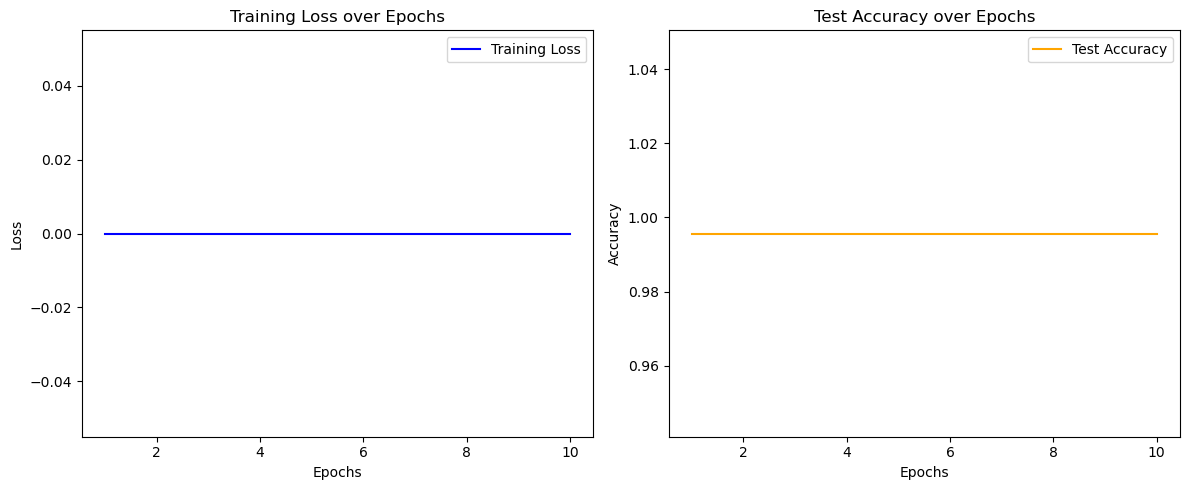

In [6]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizer = torch.optim.Adam(model.parameters(), lr=best_hyperparameters['lr'])

train_losses = []
test_accuracies = []

num_epochs = 10 

for epoch in range(num_epochs):
    
    # Training phase
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device if necessary
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = F.nll_loss(outputs, labels)  # Negative Log Likelihood Loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to device if necessary
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Final Test Accuracy
print(f'Final Test Accuracy: {accuracy:.4f}')

# Plotting Training Loss and Test Accuracy
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Plot Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


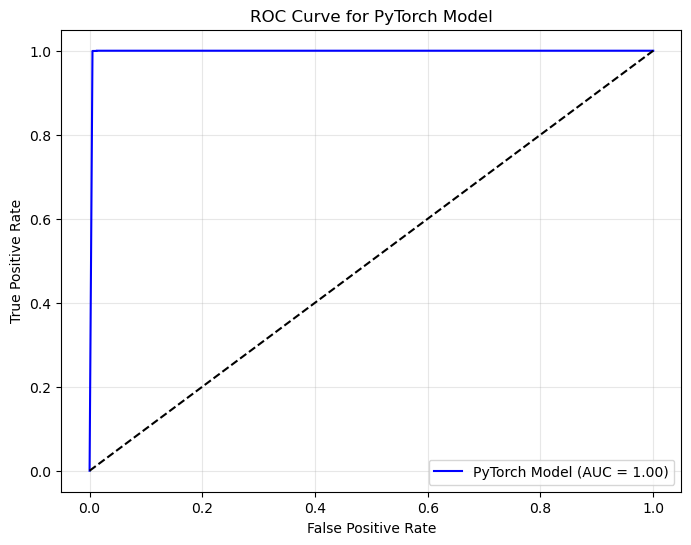

In [ ]:
import torch
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure the model is in evaluation mode
model.eval()

# Get the probabilities for the positive class
y_pred_proba = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:  # Assuming test_loader is your DataLoader for the test set
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model(inputs)  # Forward pass
        if outputs.shape[1] > 1:  # Multi-class classification
            probabilities = torch.softmax(outputs, dim=1)[:, 1]
        else:  # Binary classification
            probabilities = torch.sigmoid(outputs).squeeze()
        
        y_pred_proba.extend(probabilities.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate the ROC curve
proposed_model_fpr, proposed_model_tpr, proposed_model_thresholds = roc_curve(y_true, y_pred_proba)

# Compute the AUC score
proposed_model_auc_score = roc_auc_score(y_true, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(proposed_model_fpr, proposed_model_tpr, color='blue', label=f'PyTorch Model (AUC = {proposed_model_auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for PyTorch Model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


Confusion Matrix:
 [[1735   14]
 [   1 1713]]


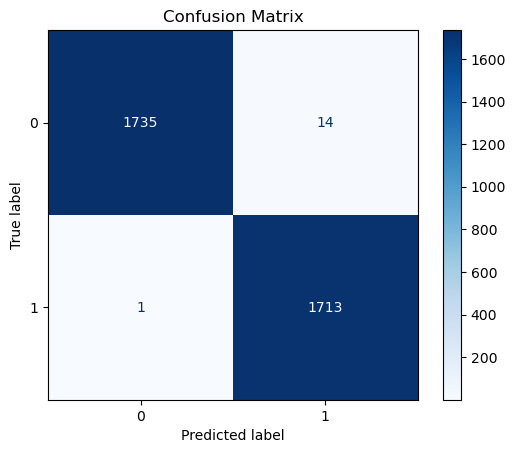

Accuracy: 0.9957
Precision: 0.9919
Recall: 0.9994
F1 Score: 0.9956


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import torch
import numpy as np
import matplotlib.pyplot as plt

# Ensure the model is in evaluation mode
model.eval()

# Initialize lists to store true and predicted labels
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:  # Assuming test_loader is your DataLoader for the test set
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Get model predictions
        outputs = model(inputs)
        if outputs.shape[1] > 1:  # Multi-class classification
            probabilities = torch.softmax(outputs, dim=1)
            predicted_labels = torch.argmax(probabilities, dim=1)
        else:  # Binary classification
            probabilities = torch.sigmoid(outputs).squeeze()
            predicted_labels = (probabilities > 0.5).long()

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted_labels.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
proposed_model_accuracy = accuracy_score(y_test, y_pred)
proposed_model_precision = precision_score(y_test, y_pred)
proposed_model_recall = recall_score(y_test, y_pred)
proposed_model_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {proposed_model_accuracy:.4f}")
print(f"Precision: {proposed_model_precision:.4f}")
print(f"Recall: {proposed_model_recall:.4f}")
print(f"F1 Score: {proposed_model_f1:.4f}")


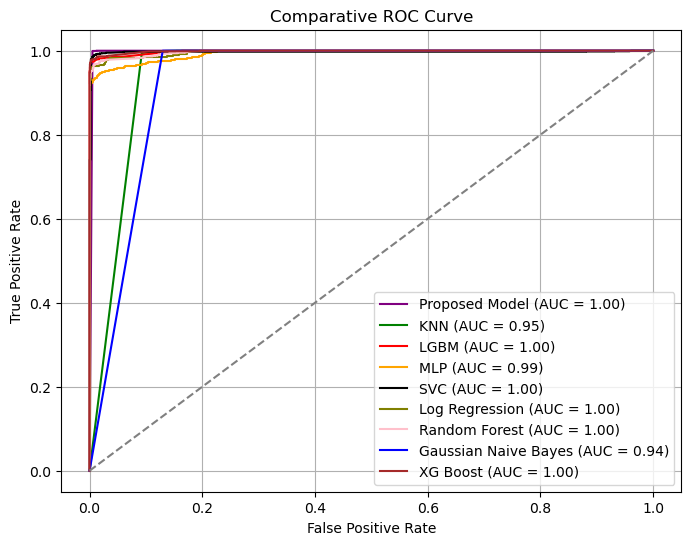

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(proposed_model_fpr, proposed_model_tpr, label=f'Proposed Model (AUC = {proposed_model_auc_score:.2f})', color='purple')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_roc_auc:.2f})', color='green')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LGBM (AUC = {lgbm_roc_auc:.2f})', color='red')
plt.plot(mlp_fpr, mlp_tpr, label=f'MLP (AUC = {mlp_roc_auc:.2f})', color='orange')
plt.plot(svm_fpr, svm_tpr, label=f'SVC (AUC = {svm_roc_auc:.2f})', color='black')
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Log Regression (AUC = {log_reg_roc_auc:.2f})', color='olive')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})', color='pink')
plt.plot(nb_fpr, nb_tpr, label=f'Gaussian Naive Bayes (AUC = {nb_roc_auc:.2f})', color='blue')
plt.plot(xg_fpr, xg_tpr, label=f'XG Boost (AUC = {xg_roc_auc:.2f})', color='brown')

# Add diagonal line for random guess
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.title('Comparative ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


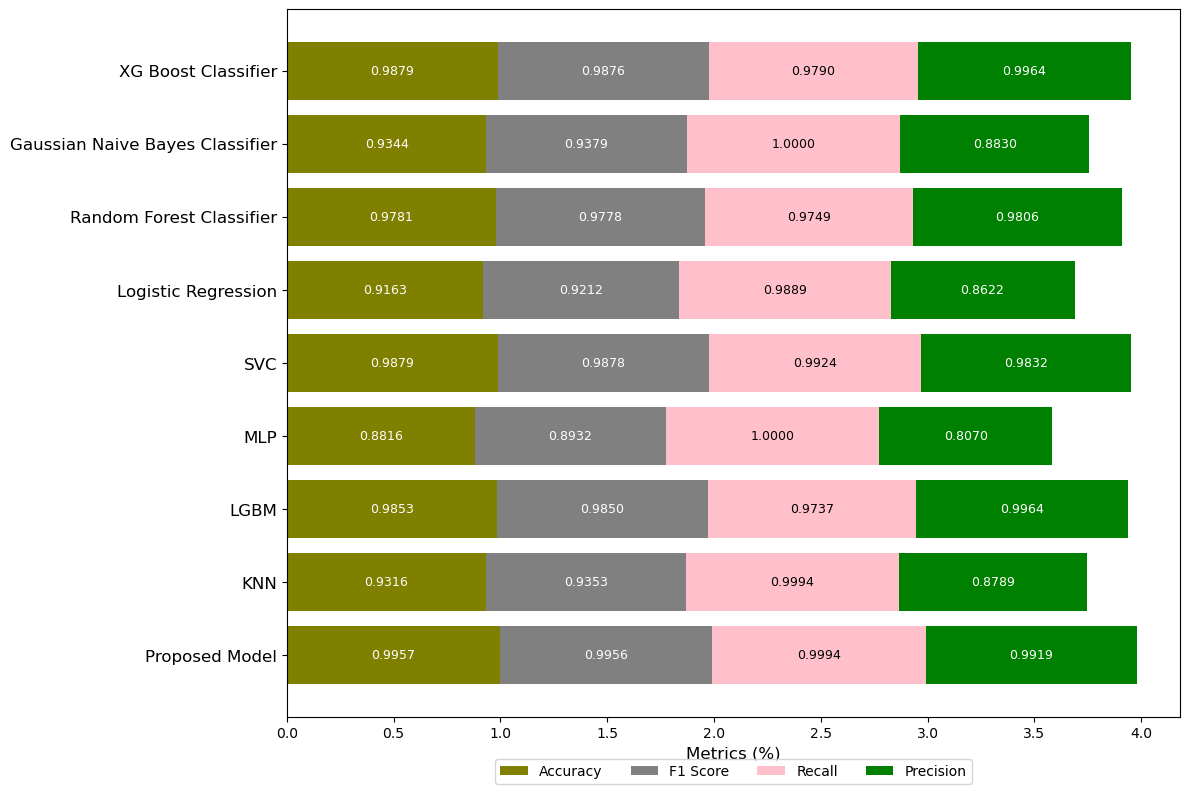

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "Proposed Model",
    "KNN",
    "LGBM",
    "MLP",
    "SVC",
    "Logistic Regression",
    "Random Forest Classifier",
    "Gaussian Naive Bayes Classifier",
    "XG Boost Classifier"
]

accuracy = [proposed_model_accuracy, knn_accuracy, accuracy_lgbm, mlp_accuracy, svm_accuracy, log_reg_accuracy, rf_accuracy, nb_accuracy, xg_accuracy]
f1_score = [proposed_model_f1, knn_f1, f1_lgbm, mlp_f1, svm_f1, log_reg_f1, rf_f1, nb_f1, xg_f1]
recall = [proposed_model_recall, knn_recall, recall_lgbm, mlp_recall, svm_recall, log_reg_recall, rf_recall, nb_recall, xg_recall]
precision = [proposed_model_precision, knn_precision, precision_lgbm, mlp_precision, svm_precision, log_reg_precision, rf_precision, nb_precision, xg_precision]

bar_width = 0.8
y = np.arange(len(models))

plt.figure(figsize=(12, 8))

# Stacking the bars
plt.barh(y, accuracy, height=bar_width, label="Accuracy", color='olive')
plt.barh(y, f1_score, height=bar_width, left=accuracy, label="F1 Score", color='gray')
plt.barh(y, recall, height=bar_width, left=np.add(accuracy, f1_score), label="Recall", color='pink')
plt.barh(y, precision, height=bar_width, left=np.add(np.add(accuracy, f1_score), recall), label="Precision", color='green')

# Adding labels and legend
plt.yticks(y, models, fontsize=12)
plt.xlabel("Metrics (%)", fontsize=12)
# plt.title("Comparison of Scores for Models", fontsize=16)
plt.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Adding value annotations
for i in range(len(models)):
    plt.text(accuracy[i] / 2, y[i], f"{accuracy[i]:.4f}", ha='center', va='center', color='white', fontsize=9)
    plt.text(accuracy[i] + f1_score[i] / 2, y[i], f"{f1_score[i]:.4f}", ha='center', va='center', color='white', fontsize=9)
    plt.text(accuracy[i] + f1_score[i] + recall[i] / 2, y[i], f"{recall[i]:.4f}", ha='center', va='center', color='black', fontsize=9)
    plt.text(accuracy[i] + f1_score[i] + recall[i] + precision[i] / 2, y[i], f"{precision[i]:.4f}", ha='center', va='center', color='white', fontsize=9)

# Tight layout for better display
plt.tight_layout()
plt.show()